# Introduction to TMA4125


Executing the following cell loads a non-default css style for the notebook. 
Make sure that you download the corresponding css file  `tma4125.css` from the course web page.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML
from numpy.linalg import norm


def css_styling():
    try:
        with open("tma4125.css") as f:
            styles = f.read()
            return HTML(styles)
    except FileNotFoundError:
        pass  # Do nothing


# Comment out next line and execute this cell to restore the default notebook style
css_styling()

We also load a number of $\LaTeX$ commands first
$$
\DeclareMathOperator{\Div}{div}
\DeclareMathOperator{\Grad}{grad}
\DeclareMathOperator{\Curl}{curl}
\DeclareMathOperator{\Rot}{rot}
\DeclareMathOperator{\ord}{ord}
\DeclareMathOperator{\Kern}{ker}
\DeclareMathOperator{\Image}{im}
\DeclareMathOperator{\spann}{span}
\DeclareMathOperator{\rank}{rank}
\DeclareMathOperator{\dist}{dist}
\DeclareMathOperator{\diam}{diam}
\DeclareMathOperator{\sig}{sig}
\DeclareMathOperator{\Id}{Id}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\NN}{\mathbb{N}}
\newcommand{\VV}{\mathbb{V}}
\newcommand{\dGamma}{\,\mathrm{d} \Gamma}
\newcommand{\dGammah}{\,\mathrm{d} \Gamma_h}
\newcommand{\dx}{\,\mathrm{d}x}
\newcommand{\dy}{\,\mathrm{d}y}
\newcommand{\ds}{\,\mathrm{d}s}
\newcommand{\dt}{\,\mathrm{d}t}
\newcommand{\dS}{\,\mathrm{d}S}
\newcommand{\dV}{\,\mathrm{d}V}
\newcommand{\dX}{\,\mathrm{d}X}
\newcommand{\dY}{\,\mathrm{d}Y}
\newcommand{\dE}{\,\mathrm{d}E}
\newcommand{\dK}{\,\mathrm{d}K}
\newcommand{\dM}{\,\mathrm{d}M}
\newcommand{\cd}{\mathrm{cd}}
\newcommand{\onehalf}{\frac{1}{2}}
\newcommand{\bfP}{\boldsymbol P}
\newcommand{\bfx}{\boldsymbol x}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bfa}{\boldsymbol a}
\newcommand{\bfu}{\boldsymbol u}
\newcommand{\bfv}{\boldsymbol v}
\newcommand{\bfe}{\boldsymbol e}
\newcommand{\bfb}{\boldsymbol b}
\newcommand{\bfc}{\boldsymbol c}
\newcommand{\bfq}{\boldsymbol q}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bff}{\boldsymbol f}
\newcommand{\bfp}{\boldsymbol p}
\newcommand{\bft}{\boldsymbol t}
\newcommand{\bfj}{\boldsymbol j}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfV}{\boldsymbol V}
\newcommand{\bfE}{\boldsymbol E}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfzero}{\boldsymbol 0}
$$

## Overview over the course

 * Analytical and numerical techniques for solving ordinary differential equations (ODEs) as well as partial differential equations (ODEs)
 * Introduction into numerical methods and concepts in general
 
 All relevant course information can be found at our 
[course webpage](https://wiki.math.ntnu.no/tma4125/2021v/start)
including a detailed description of the [curriculum](https://wiki.math.ntnu.no/tma4125/2021v/lectures).

## Preliminaries
 
In this note, we will present some mathematical results that will be 
used frequently, as well as some definitions and concepts. Most of it should be known from
previous courses, in particular from Mathematics 1 and 3. 
 

## Vector spaces and norms
**Real vector spaces.**

A *real vector space* is a set $V$ together with operations $+$ (addition) 
and $\cdot$ (multiplication with a scalar) which
satisfy the following conditions:

1. &emsp;$x+y \in V$ for all $x$, $y \in V$.
2. &emsp;$x+y = y+x$ for all $x$, $y \in V$.
3. &emsp;$x+(y+z) = (x+y)+z$ for all $x$, $y$, $z \in V$.
4. &emsp;There exists some element $0 \in V$ such that $x + 0 = x$ for all $x \in V$.
5. &emsp;For all $x \in V$, there exists some element $(-x) \in V$ such that $x + (-x) = 0$.
6. &emsp;$\alpha\cdot x \in V$ for all $x \in V$ and $\alpha \in \mathbb{R}$.
7. &emsp;$\alpha\cdot(\beta\cdot x) = (\alpha\beta)\cdot x$ for all $x \in V$ and $\alpha$, $\beta \in \mathbb{R}$.
8. &emsp;$1\cdot x = x$ for all $x \in V$.
9. &emsp;$\alpha\cdot(x+y) = \alpha\cdot x + \alpha\cdot y$ for all $x$, $y \in V$ and $\alpha \in \mathbb{R}$.
10. &emsp;$(\alpha+\beta)\cdot x = \alpha\cdot x + \beta\cdot x$ for all $x \in V$ and $\alpha$, $\beta \in \mathbb{R}$.

**Complex vector spaces** are defined in exactly the same way, just replacing $\mathbb{R}$ with $\mathbb{C}$  in the definition above, so
that the scalars are now allowed to be complex numbers.


#### Examples:
The following vector spaces will be used thoughout the course:

* $\mathbb{R}^m$ is the set of all real vectors with $m$ components. 

* $\mathbb{R}^{m\times n}$ is the set of all $m\times n$ real matrices.

* $\mathbb{P}_n$ is the set of all polynomials of degree $n$ or less.

* $C^m[a,b]$ is the set of all functions with continuous first $m$ derivatives on the interval $[a,b]$. It is common to use $C[a,b]$ rather than $C^0[a,b]$ for all continuous functions.   

Notice that $C^n[a,b] \subset C^m[a,b]$ if $n > m$. 
Further, $\mathbb{P}_n \subset C^{\infty}[\mathbb{R}]$.

**Exercise.** Verify that $\mathbb{P}_n$ and $C^m[a,b]$ indeed are vector spaces.
For that recall that the operations "adding two functions" and "multiplying a function with a scalar" are defined as usual by defining the resulting functions pointwise:
$$
(f + g)(x) := f(x) + g(x) \\
(\alpha f)(x) :=  \alpha f(x)
$$ 

**Question from audience:** Can we define Function with different variables $ f(x), g(y)$?

Addition is not immediately
defined but you can define "new functions" $\widetilde{f}(x,y) := f(x)$ and $\widetilde{g}(x,y) := g(y)$  to make sense of it and then set
$(f + g)(x,y) := f(x) + g(x)$

### Norms

**Norm $\lVert\cdot\rVert$.**

A norm is a function $\lVert\cdot\rVert \colon V \to \mathbb{R}$ such that the following hold:
1. &emsp;$\lVert x \lVert \ge 0$ for all $x \in V$.
2. &emsp;$\lVert x \rVert = 0$ if and only if $x = 0$.
3. &emsp;$\lVert \alpha \cdot x \rVert = \lvert \alpha \rvert \,\lVert x \rVert$ for all $x \in V$ and $\alpha \in \mathbb{R}$.
4. &emsp;$\lVert x + y\rVert \le \lVert x \rVert + \lVert y \rVert$ for all $x$, $y \in V$. (*triangle inequality*)

The norm $\lVert\cdot\rVert$ of an element $x$ in a vector space $V$ is essentially a measure of the size of the element. More importantly, the norm $\lVert x-y\rVert$ of a difference of two vectors $x$, $y \in V$ is a measure for the distance between $x$ and $y$, or, put differently, of how similar $x$ and $y$ are.

**Norms for $\mathbb{R}^m$ and $C[a,b]$:**

For any given vector space $V$, there are usually different meanigful definitions of norm that encode different notions of similarity of elements of the vector space.

For $\mathbf{x} \in \mathbb{R}^m$ (note that we will use bold symbols for vectors $\mathbf{x} \in \mathbb{R}^m$):

  * The maximum-norm $\|\mathbf{x}\|_{\infty} = \max_{i=1}^m |x_i|$. 

  * The Euclidean norm $\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^m x_i^2}$.
  
  * More, generally, we can define the $l^P$ norm of a vector $\mathbf{x}$ by
  $\|\mathbf{x}\|_p = \left(\sum_{i=1}^m x_i^p\right)^{1/p}$, $1\leqslant p \leqslant \infty$
  
 

**Norms for $\mathbb{R}^m$ and $C[a,b]$:**

For any given vector space $V$, there are usually different meanigful definitions of norm that encode different notions of similarity of elements of the vector space.

For $\mathbf{x} \in \mathbb{R}^m$ (note that we will use bold symbols for vectors $\mathbf{x} \in \mathbb{R}^m$):

  * The maximum-norm $\|\mathbf{x}\|_{\infty} = \max_{i=1}^m |x_i|$. 

  * The Euclidean norm $\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^m x_i^2}$.
  
  * More, generally, we can define the $l^P$ norm of a vector $\mathbf{x}$ by
  $\|\mathbf{x}\|_p = \left(\sum_{i=1}^m |x_i|^p\right)^{1/p}$.
  
 

For $f\in C[a,b]$, similar norms can be defined: 

  * The maximum-norm $\|f\|_{\infty} = \max_{x\in [a,b]}|f(x)|$.

  * The $L^2$-norm $\|f\|_2 = \sqrt{\int_a^b f(x)^2 \dx}$.
  
  * The $L^p$-norm $\|f\|_p = \left(\int_a^b |f(x)|^p \dx\right)^{1/p}$.
 
Thus for two functions $f,g \in C[a,b]$, the expression
 $\|f - g\|_{\infty}$ measures the *maximal* pointwise difference of $f(x)$ and $g(x)$, while the term $\|f - g\|_2$  measures the *average* (quadratic) difference of| $f(x)$ ad $g(x)$. 

We will always use the absolute value as the norm of a real number, thus
$\|x\|=|x|$ whenever $x\in \mathbb{R}$.   

**Example 1:**
Let $\mathbf{x}=[1,-6,3,-1,5]^T\in \mathbb{R}^5$. Then

$$
\begin{aligned}
  \|\mathbf{x}\|_2 &= \sqrt{1+36+9+1+25} \approx 8.4853, \\ 
  \|\mathbf{x}\|_{\infty} &= \max\{1,6,3,1,5\}= 6.
\end{aligned}
$$

Norms of vectors in $\mathbb{R}^m$  are implemented in Python.

In [2]:
%matplotlib inline

newparams = {
    "figure.figsize": (8.0, 4.0),
    "axes.grid": True,
    "lines.markersize": 8,
    "lines.linewidth": 2,
    "font.size": 14,
}
plt.rcParams.update(newparams)

In [3]:
# The norm of a vector in R^n
x = np.array([1, -6, 3, -1, 5])
nx_2 = norm(x)  # The 2-norm is the default
nx_inf = norm(x, ord=np.inf)  # The max-norm
print("x = \n", x)
print(f"The 2-norm   of x: {nx_2:8.4f}")
print(f"The max-norm of x: {nx_inf:8.4f}")

x = 
 [ 1 -6  3 -1  5]
The 2-norm   of x:   8.4853
The max-norm of x:   6.0000


**Example 2:**
Let $f(x)=\sin(x)$ on $[0,2\pi]$, so $f\in C^{\infty}[0,2\pi]$. In this case

$$
\begin{aligned}
  \|f\|_2 &= \displaystyle \sqrt{\int_0^{2\pi} \sin^2(x) dx} = \sqrt{\pi} \approx 1.7725 \\ 
  \|f\|_{\infty} &= \displaystyle \max_{x\in[0,2\pi]}|\sin(x)| = 1.
\end{aligned}
$$

### Scalar products

A **scalar product** (also called **inner product**) $\langle \cdot, \cdot \rangle$ on a **real** vector
space $V$ is a **symmetric, positive definite bilinear form** on V; that is, it is
a mapping $\langle \cdot, \cdot \rangle: V \times V \to \mathbb{R}$
which is a **bilinear**

1.    &emsp; $\langle \alpha x + \beta y, z \rangle  
             =  \alpha \langle  x , z \rangle +  \beta \langle y, z \rangle \quad$ for all $x,y,z \in V$ and $\alpha, \beta \in \mathbb{R}$,
2.    &emsp; $\langle  z, \alpha x + \beta y \rangle  
             =  \alpha \langle  z, x \rangle +  \beta \langle z, y \rangle \quad$
for all $x,y,z \in V$ and $\alpha, \beta \in \mathbb{R}$,

**symmetric**

3. &emsp; $\langle x,y \rangle = \langle y, x \rangle$

and **positive definite**

4. &emsp;  $\langle x, x \rangle \geqslant 0 \quad$ and $\quad \langle x, x \rangle = 0 \Leftrightarrow x = 0$

An inner product on $V$ automatically induces a Norm on $V$ via
\begin{align*}
V \ni x  \mapsto \|x\| := \sqrt{\langle x, x\rangle}  
\end{align*}
 
 
 **Exercise**: Verify this.

**Example 1:** Let $\bfx, \bfy \in \RR^m$ and define
$$
\langle \bfx, \bfy \rangle := \bfx \cdot \bfy := \sum_{i=1}^m x_i y_i
$$

**Example 2:** Let $f, g \in C[a,b]$ and set
$$
\langle f, g \rangle := \int_a^b f(x) g(x) \dx
$$
$$
\langle \alpha_1 f_1 + \alpha_2 f_, g \rangle = \alpha_1 \int_a^b f_1(x) g(x) \dx + \alpha_2 \int_a^b f_2(x) g(x) \dx
$$

Then this define a scalar product. Clearly, this expression defines a symmetric bilinear form on $C[a,b]$ (verify this), but what about being positive definite?
Of course $\langle f, f \rangle = \int_a^b (f(x))^2 \dx \geqslant 0$ 
but why does $\langle f, f \rangle = 0 \Leftrightarrow  f = 0 $, that is $f(x) = 0 \;\forall x \in [a,b]$  hold?

Proof by contradiction: Imagine $f$ attains at $x_0$ a value $f(x_0) = c > 0$. Since $f$
is continuous, there must be an $\epsilon > 0$ such that $f(x) > c/2$
for $x \in [x_0 - \epsilon, x_0 + \epsilon]$. Consequently,
$$
\langle f, f \rangle = \int_a^b (f(x))^2 \dx \geqslant
\int_{x_0 -\epsilon}^{x_0+ \epsilon}  (f(x))^2 dx
\geqslant \int_{x_0 -\epsilon}^{x_0+ \epsilon}  (c/2)^2 \dx > 0.
$$

**Orthogonal vectors.** Assume that $V$ is a vector space with a scalar product
$\langle \cdot, \cdot \rangle$. Then $x,y \in V$ are said to be orthogonal
if $\langle x, y \rangle  = 0$.

**Example 1** $V = \RR^3$ with standard inner product, then
$\bfx = [1, 2, 3]^T$ and $\bfy = [3,0,-1]^T$ are orthogonal.

**Example 2:** Let $V=C[-1,1]$ with the inner produc $\langle f, g \rangle := \int_{-1}^{1} f(x) g(x) \dx$. Set
$f(x) = x$ and $g(x) = x^2$.
Then $\langle f, g \rangle = 0$ 

**Exercise** Verify this.

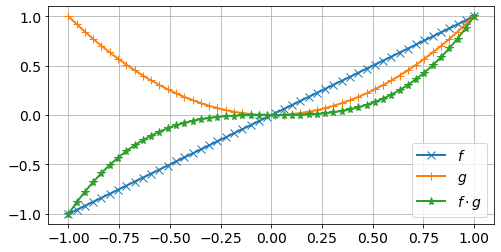

In [4]:
f = lambda x: x
g = lambda x: x**2
f_g = lambda x: f(x) * g(x)
x = np.linspace(-1, 1, 50)
plt.plot(x, f(x), marker="x", label="$f$")
plt.plot(x, g(x), marker="+", label="$g$")
plt.plot(x, f_g(x), marker="*", label=r"$f\cdot g$")
plt.legend()

Note that the specific interval $[a,b]$ in the definition of
$\langle f, g \rangle := \int_a^b f(x) g(x) \dx$ is important.
For instance the two functions $f$ and $g$ defined above are 
orthogonal on $[-1, 1]$ and any other symmetric interval $[-a, a]$ around
$0$, but there are **not** orthogonal on the interval $[0,1]$.

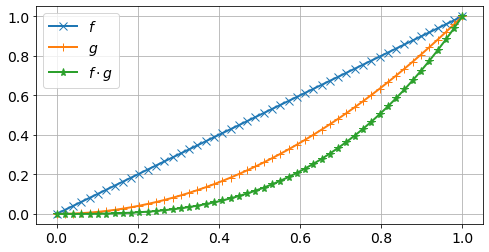

In [5]:
x = np.linspace(0, 1, 50)
plt.plot(x, f(x), marker="x", label="$f$")
plt.plot(x, g(x), marker="+", label="$g$")
plt.plot(x, f_g(x), marker="*", label=r"$f\cdot g$")
plt.legend()

### Cauchy-Schwarz inequality
Reminder from Calculus 3.
Assume we have a vector space $V$ endowed with an inner product 
$\langle \cdot, \cdot\rangle$. Then for $f, g \in V$ it holds that
$$
|\langle f, g \rangle| \leqslant \|f\| \|g\|.
$$
This is the Cauchy-Schwarz inequality and holds for any abstract inner product.
More precisely, we have that
$$
|\langle f, g \rangle| < \|f\| \|g\|
$$ 
unless $f = \lambda g$ for some $\lambda \in \RR$.

### Gram-Schmidt Orthogonalization

Let $\{\bfa_1,\ldots,\bfa_n\} \subset \RR^m$ $n$ linear independent
vectors in $\RR^m$. The Gram-Schmidt orthogonalization process
allows to orthogonalizes that set, that means, we can construct
a set $\{\bfq_1, \ldots, \bfq_n \}$ of orthogonal (orthonormal) vectors which have the same span as the original set.

\begin{alignat*}{3}
\bfy_1 &:= \bfa_1, \quad & &\bfq_1 := \dfrac{\bfy_1}{\|\bfy_1\|}
\\
\bfy_2 &:= \bfa_2 - \langle \bfq_1, \bfa_2 \rangle \bfq_1, \quad & &\bfq_2 := \dfrac{\bfy_2}{\|\bfy_2\|}
\\
\ldots 
\\
\bfy_k &:= \bfa_k - \sum_{i=1}^{k-1} \langle \bfq_i, \bfa_k \rangle \bfq_i, \quad & &\bfq_k := \dfrac{\bfy_k}{\|\bfy_k\|}
\\
\ldots
\\
\bfy_n &:= \bfa_n - \sum_{i=1}^{n-1} \langle \bfq_i, \bfa_n \rangle \bfq_i, \quad & &\bfq_n := \dfrac{\bfy_n}{\|\bfy_n\|}
\end{alignat*}

Observe that Gram-Schmidt orthogonalization makes perfect sense 
for any independent finite set of vectors $\{f_1, \ldots f_n\} \subset V$
for some vector space $V$ endowed with a scalar product $\langle \cdot,\cdot\rangle$!

**Exercise 1.** Show that the functions $\{1, x, x^2\} \subset \mathbb{P}_2$
are linearly independent.

**Exercise 2.** Use Gram-Schmidt to orthogonalize/orthonormalize the
functions $\{1, x, x^2\}$ on the interval $[0,1]$.

### Orthogonal projection

There are several equivalent ways to define an orthogonal projection.
Assume we have a vector space $V$ endowed with an inner product 
$\langle \cdot, \rangle$ and a
finite dimensional subspace $V_n \subset V$. Thanks to Gram-Schmidt,
we also know that we can construc an orthornomal basis $\{e_1, \ldots, e_n\}$
of $V_n$.

We define the orthogonal projection 
$$
\Pi_{V_n} := \Pi_n : V \to V
$$

by requiring that for $v \in V$, $\Pi_n v$ must satisfy
$$
\langle \Pi_n v, w \rangle = \langle v, w \rangle \quad \forall w \in V_n.
$$

Or in other words, the difference vector, (also called **projection error**) $\Pi_n v - v$ must satisfy a
**orthorgonality property**
with respect to the subspace $V_n$:
$$
\langle \Pi_n v - v, w \rangle = 0 \quad \forall w \in V_n.
$$

The projection is well defined.
Assuming that $\Pi_n v$ exists, we can express in terms of the orthonormal
basis $\{e_1, \ldots, e_n\}$:
$$
\Pi_n v = \sum \tilde{v}_i e_i
$$
Any vector $w \in V_n$ can be written as
$$
w = \sum_{j=1}^n w_j e_j
$$
Thus
\begin{align*}
\langle \Pi_n v, w \rangle 
&= \sum_{j=1} w_j \langle \Pi_n v, e_j \rangle
\\
&= \sum_{j=1} w_j \sum_{i=1}^{n} \tilde{v}_i \langle v_i, e_j \rangle
\end{align*}
On the other  hand 
\begin{align*}
\langle v, w \rangle = \sum_{j=1}^n w_j \langle e_i, e_j \rangle
\end{align*}

So in order to satisfy the requirement above, we must have that
for $ j = 1, \ldots, n$ 
$$
\sum_{i=1}^{n} \tilde{v}_i \langle e_i, e_j \rangle
= \sum_{i=1}^{n} \tilde{v}_i \langle e_j, e_i \rangle
= \underbrace{\langle v, e_j \rangle}_{:= b_j}
$$
Since $\langle e_i, e_j \rangle = \delta_{ij}$ is the Kronecker delta symbol which is $=0$ if $i\neq j$ and $=1$ if $i=j$ we see that the last equation can be written as a simple matrix system to 
$$
\Id [\tilde{v_1}, \ldots, \tilde{v_n}^T] = [b_1, \ldots, b_n ]^T
$$


**Best approximation theorem**

For any $v \in V$, we have that 
$$
\|\Pi_n v - v \| = \min_{w \in V_n} \| w - v \|
$$

*Proof*

Take any $w\in V_n$. Then
\\begin{align*}
\|\Pi_n v - v \|^2 
&=
\langle \Pi_n v - v, \Pi_n v - v \rangle
\\
&=
\langle \Pi_n v - v, \Pi_n v - w + w - v \rangle
\\
&=
\underbrace{\langle \Pi_n v - v, \Pi_n v - w \rangle}_{=0}
+ \langle \Pi_n v - v, w - v \rangle
\\
&\leqslant \| \Pi_n v - v \| \| w - v\|
\end{align*}
where we use the orthogonality property of the projection error and the Cauchy Schwarz inequality.

# Taylor-expansions
Given a function $f\in C^{\infty}[a,b]$. Choose a point $x_0$ and an increment $h = x - x_0$ such that $x_0, x_0+h \in [a,b]$. The Taylor series expansion of $f$ around $x_0$ is then given by

$$
\sum_{k=0}^{\infty} \frac{f^{(k)}(x_0)}{k!}(x-x_0)^k = \sum_{k=0}^{\infty} \frac{f^{(k)}(x_0)}{k!}h^k
$$

The function $f$ is called analytic in $x_0$ if the series converges for sufficiently small values of $|h|$ to $f$, that is, if
$$
f(x) =  \sum_{k=0}^{\infty} \frac{f^{(k)}(x_0)}{k!}(x-x_0)^k
$$

In numerics, we will usually work with the trunctated series, also called the Taylor polynomial (+ remainder term), which exists for all $f \in C^{k+1}[a,b]$:

$$
f(x) = \underbrace{\sum_{k=0}^{m} \frac{f^{(k)}(x_0)}{k!}(x-x_0)^k}_{=: g(x)} + R_{m+1}(x_0).
$$

Here the remainder term is given by

$$
R_{m+1}(x_0) = \frac{f^{(m+1)}(\xi)}{(m+1)!} (x-x_0)^{m+1},
$$

where $\xi$ is some unknown point between $x_0$ and $x$.

Often we write this as
$$
f(x_0 + h) = \sum_{k=0}^{m} \frac{f^{(k)}(x_0)}{k!} h^k + \mathcal{O}(h^{m+1}).
$$

Here we used the the **Big $\mathcal{O}$-notation**.
Let $f$ and $g$ be some real valued function and $a \in \mathbb{R}$. We say that
$$
f(x) = \mathcal{O}(g(x))
\qquad\text{ as } x \rightarrow a,
$$
if there exist $\delta > 0$ and $M > 0$ such that

$$
|f(x)| \leq M|g(x)| \qquad \text{when} \qquad 0 < |x-a|<\delta.
$$

That is, locally around the point $a$, the function $f$ can be bounded, up to a constant, by the function $g$.

# Some other useful results

**Result 1:**
Let $f\in C[a,b]$ and let $u$ be some number between $f(a)$ and $f(b)$, then there exist at least one $\xi \in (a,b)$ such that $f(\xi)=u$.

**Result :2**
(Rolle's theorem) Let $f\in C^1[a,b]$ and $f(a)=f(b)=0$. Then there exists at least one $\xi \in (a,b)$ such that $f'(\xi)=0$.

**Result 3:**
 Let $f\in C^1[a,b]$. Then there exists at least one $\xi\in (a,b)$ such that

$$
f'(\xi) = \frac{f(b)-f(a)}{b-a}
$$